MSE error for cubic spline interpolation: 0.00043098991699713215


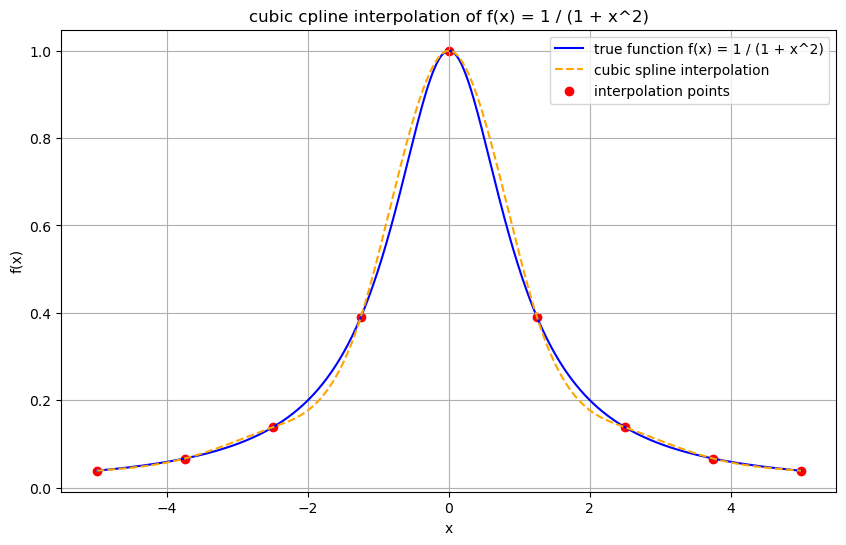

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def natural_cubic_spline(x, y):
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]
    a = y

    #setting alpha
    alpha = [0] + [3/h[i] * (a[i+1] - a[i]) - 3/h[i-1] * (a[i] - a[i-1]) for i in range(1, n)]

    #setting l, mu and z
    l = [1] + [0] * n
    mu = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
        
    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    
    #lets calculate coefficents
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    coefficients = [(a[j], b[j], c[j], d[j]) for j in range(n)]
    return coefficients

def evaluate_spline(x_vals, koeficienti, x_points):
    spline_values = []
    
    for x in x_vals:
        for j in range(len(x_points) - 1):
            if x_points[j] <= x <= x_points[j + 1]:
                a, b, c, d = koeficienti[j]
                dx = x - x_points[j]
                spline_values.append(a + b * dx + c * dx**2 + d * dx**3)
                break
                
    return spline_values

#i decide to take points interval of 1.25
arr = [-5, -3.75,-2.5, -1.25, 0, 1.25, 2.5, 3.75, 5]
x_points = np.array(arr) 
y_points = 1 / (1 + x_points**2)

#get spline coefficient
coefficients = natural_cubic_spline(x_points, y_points)

#for mse error and plotting
vals_x = np.linspace(-5, 5, 500)
vals_y = 1 / (1 + vals_x ** 2)
vals_spline = evaluate_spline(vals_x, coefficients, x_points)

#MSE error
print(f"MSE error for cubic spline interpolation: {np.mean((vals_y - vals_spline)**2)}")

#plotting part i love it
plt.figure(figsize=(10, 6))
plt.plot(vals_x, val    s_y, color='blue', label='true function f(x) = 1 / (1 + x^2)')
plt.plot(vals_x, vals_spline,  linestyle='--', color='orange', label='cubic spline interpolation')
plt.scatter(x_points, y_points, color='red', label='interpolation points')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('cubic cpline interpolation of f(x) = 1 / (1 + x^2)')
plt.grid(True)